**Work in Progress**

### Reference : https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pfizer-vaccine-tweets/vaccination_tweets.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df=pd.read_csv('../input/pfizer-vaccine-tweets/vaccination_tweets.csv')

In [4]:
df.head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False


In [5]:
df.shape

(6981, 16)

In [6]:
df.isna().sum()

id                     0
user_name              0
user_location       1411
user_description     440
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1716
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

# Basic EDA

Text(0.5, 1.0, 'Verified Users')

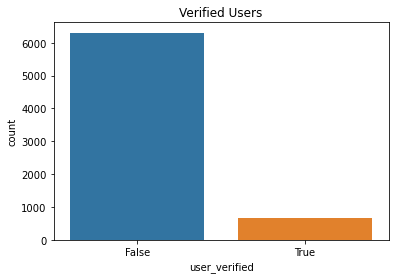

In [7]:
sns.countplot(data=df,x='user_verified').set_title('Verified Users')

In [8]:
df['timestamp'] = df['date'].apply(lambda x : pd.to_datetime(str(x)))
df['Month']=df['timestamp'].dt.month
df['date']=df['timestamp'].dt.date

Text(0.5, 1.0, 'No.of Tweets by Month')

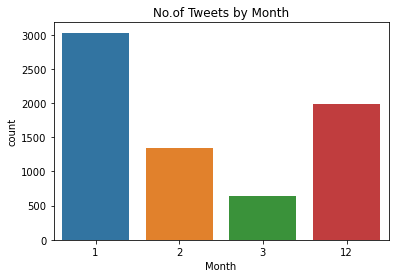

In [9]:
sns.countplot(data=df,x='Month').set_title('No.of Tweets by Month')

Text(0.5, 1.0, 'No.of Tweets by Date')

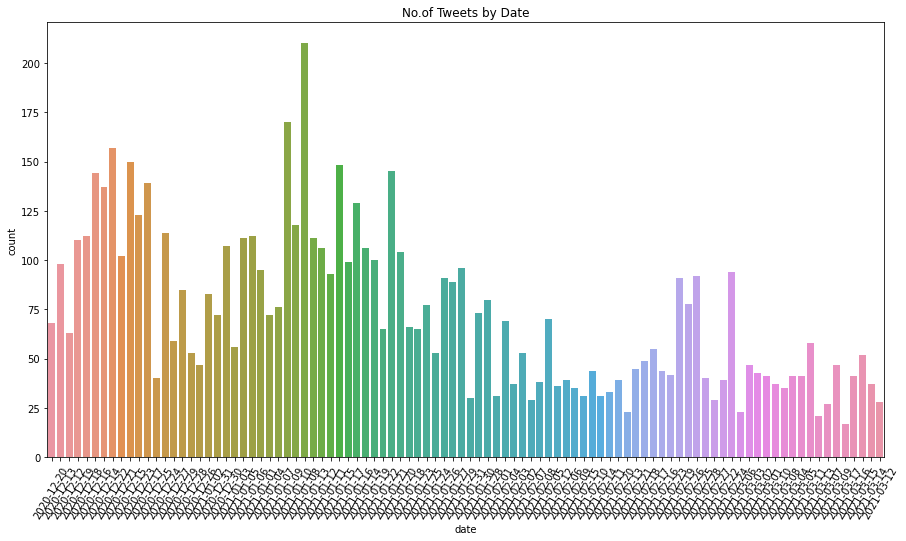

In [10]:
df.sort_values('date')

plt.figure(figsize=(15,8))
ax=sns.countplot(data=df,x='date').set_title('No.of Tweets by Date')
locs, labels = plt.xticks()
plt.setp(labels, rotation=60)
ax

In [11]:
fig = px.histogram(df, x=df['date'],title='No.of Tweets by Date')
fig.update_traces(marker_color='green')
fig

In [12]:
fig = px.histogram(df, x=df['text'].str.len(),nbins=15,title='Tweets Length')
fig

# Natural Language Processing

In [13]:
import string
import nltk
import warnings
import re
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [14]:
# Removing Twitter Handles
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [15]:
df['text_new'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")

In [16]:
# Removing Punctuations, Numbers, and Special Characters
df['text_new'] = df['text_new'].str.replace("[^a-zA-Z#]", " ")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [17]:
# Removing Short Words
df['text_new'] = df['text_new'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [18]:
df['text_new']

0       Same folks said daikon paste could treat cytok...
1       While world been wrong side history this year ...
2       #coronavirus #SputnikV #AstraZeneca #PfizerBio...
3       Facts immutable Senator even when ethically st...
4       Explain again need vaccine #whereareallthesick...
                              ...                        
6976    Just first Covid vaccine hope side effects kee...
6977    #Putin #vaccines Hardly #PfizerBiontech #Moder...
6978          THANK VACCINE #PfizerBiontech https eAetNMU
6979    #CedarsAtStLouisPark committed knocking #COVID...
6980    #CedarsAtStLouisPark committed knocking #COVID...
Name: text_new, Length: 6981, dtype: object

In [19]:
# Tokenization
tokenized_tweet = df['text_new'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Same, folks, said, daikon, paste, could, trea...
1    [While, world, been, wrong, side, history, thi...
2    [#coronavirus, #SputnikV, #AstraZeneca, #Pfize...
3    [Facts, immutable, Senator, even, when, ethica...
4    [Explain, again, need, vaccine, #whereareallth...
Name: text_new, dtype: object

In [20]:
# Stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [same, folk, said, daikon, past, could, treat,...
1    [while, world, been, wrong, side, histori, thi...
2    [#coronaviru, #sputnikv, #astrazeneca, #pfizer...
3    [fact, immut, senat, even, when, ethic, sturdi...
4    [explain, again, need, vaccin, #whereareallthe...
Name: text_new, dtype: object

In [21]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
df['text_new'] = tokenized_tweet

## Wordcloud

In [22]:
df['text_new']

0       same folk said daikon past could treat cytokin...
1       while world been wrong side histori thi year h...
2       #coronaviru #sputnikv #astrazeneca #pfizerbion...
3       fact immut senat even when ethic sturdi enough...
4       explain again need vaccin #whereareallthesickp...
                              ...                        
6976    just first covid vaccin hope side effect keep ...
6977    #putin #vaccin hardli #pfizerbiontech #moderna...
6978            thank vaccin #pfizerbiontech http eaetnmu
6979    #cedarsatstlouispark commit knock #covid #weca...
6980    #cedarsatstlouispark commit knock #covid #weca...
Name: text_new, Length: 6981, dtype: object

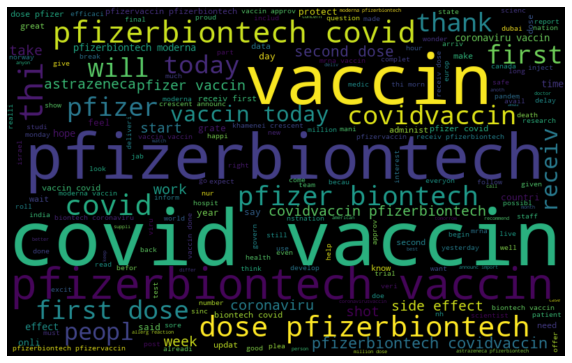

In [23]:
all_words = ' '.join([text for text in df['text_new']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()